<a href="https://colab.research.google.com/github/heymango/2020_cau_oss_hackathon/blob/master/hackathon_team05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 해커톤 진행 주의사항**

**1)  개발 관련 주의사항**
*   [1. 초기 환경 설정]은 절대 수정하지 말 것
*   모든 구현은 [2. 데이터 전처리] 및 [3.모델 생성]에서만 진행
*   [4. 모델 저장]에서 team_name 변수 변경 (예.`team_name = 'team01'`)
 *    트레이닝 중간에 checkpoint를 활용하여 모델을 저장한 경우에도 파일 이름 양식 통일 필수
*   Colab 사용중 실수로 데이터 손실이 발생할 수도 있으니 중간 결과값을 github에 업로드 
 *    "런타임->모든 런타임 재설정"은 절대 누르지 말 것 (저장한 모델 데이터가 모두 삭제됨)
*   효율적인 구현 및 테스팅을 위해 GPU 가속 기능 활성화
 *    "런타임 -> 런타임 유형변경 -> 하드웨어 가속기 -> GPU 설정"
*   주석을 최대한 자세히 작성
*   Keras API 관련하여 [Keras Documentation](https://keras.io/) 참조

**2) 제출 관련 주의사항**
*  제출물
 *  소스코드 (hackathon_teamXX.ipynb)
 *  컴파일된 모델 파일 (model_entire_teamXX.h5)
 *  모델 발표 자료 
* 제출 기한: **오후 5시 (단, 발표자료는 11시)**
* 제출 방법: [GitHub README](https://github.com/cauosshackathonta/2020_cau_oss_hackathon/) 참조

 
**3) 평가 관련 주의사항**
*  모델 성능 = 테스트 데이터 셋 분류 정확도
 *  model.evaluate(x_test, y_test)
*  제출된 모델들의 테스트 데이터 셋 분류 정확도를 기준으로 수상작 결정
*  수상 후보들에 대해서는 소스코드를 기반으로 모델 재검증 
 
**4) 수상 실격 사유**
*  유사한 소스코드 or 알고리즘이 적발될 경우
*  소스코드와 제출된 모델이 상이한 경우
*  개발 관련 주의사항을 지키지 않은 경우
 *  예: [초기 환경 설정]을 수정한 경우
*  데이터 셋을 변조한 경우
 *  예. 테스트 데이터 셋을 트레이닝 데이터 셋에 포함하여 모델 생성 
*  주석이 소스코드와 맞지 않거나 미비할 경우






# **1. 초기 환경 설정**



In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras 및 관련 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

import numpy as np

# 데이터셋 다운로드
check = !if [ -d 'dataset/' ]; then echo "1" ; else echo "0"; fi
if (check[0] is '0' ):
  !mkdir dataset
  !wget 'https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip'
  !unzip matlab.zip -d /content/dataset

# 데이터셋 로드
from scipy import io as spio
emnist = spio.loadmat("/content/dataset/matlab/emnist-balanced.mat")

x_train = emnist["dataset"][0][0][0][0][0][0]
y_train = emnist["dataset"][0][0][0][0][0][1]

x_test = emnist["dataset"][0][0][1][0][0][0]
y_test = emnist["dataset"][0][0][1][0][0][1]

# # 분류를 위해 클래스 벡터를 바이너리 매트릭스로 변환
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 데이터 28x28 이미지화
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# 총 클래스 개수
num_classes = y_test.shape[1]
input_shape = x_test.shape[1:]

# **2. 데이터 전처리**



In [165]:
# 데이터 전처리 (예: normalization)
x_train_after = np.round_(x_train / 255.0, 1)
x_test_after = np.round_(x_test / 255.0, 1)

# **3. 모델 생성**

In [168]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D
from tensorflow.python.keras.preprocessing.image import array_to_img
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# 순차 모델 생성 (가장 기본구조)
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.25))

# Flatten layer: 28 x 28 x 1 image를 784개의 1D vector input으로 변환
model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(1024, activation=tf.nn.relu))

# Output layer: fully-connected layer 
# (# of inputs = 64, # of outputs = 47, actication fuction = softmax)

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(47, activation=tf.nn.sigmoid))

# 모델 컴파일
# optimizer: 모델을 업데이트 하는 방식
# loss: 모델의 정확도를 판단하는 방식
# metrics: 트레이닝 및 테스팅 성능 모니터링을 위한 평가지표
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 7, 7, 64)        

In [169]:
# use Adam optimizer 
# initial learning rate : 1e-4, initial weight decay : 1e-6 
optimizer = keras.optimizers.Adam(lr=1e-4, decay=1e-6)

# model compile
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# learning rate reduction 
# adjust learning rate dynamically to prevent local minima
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [170]:
'''
we  use the advantage of deep learning "data reusable".
model can be made more strong and robust by using data aumentation.
'''

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train_after)

In [172]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

history = model.fit(datagen.flow(x_train_after,y_train, batch_size=64),
                              epochs = 50, validation_data = (x_test_after, y_test),
                              verbose = 2, steps_per_epoch=x_train_after.shape[0] // 64
                              ,callbacks=[learning_rate_reduction,cp_callback])

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.85202, saving model to /content/checkpoint_entire_best.h5
1762/1762 - 30s - loss: 0.8479 - accuracy: 0.7311 - val_loss: 0.4491 - val_accuracy: 0.8520
Epoch 2/50

Epoch 00002: val_accuracy improved from 0.85202 to 0.86479, saving model to /content/checkpoint_entire_best.h5
1762/1762 - 30s - loss: 0.6670 - accuracy: 0.7799 - val_loss: 0.3963 - val_accuracy: 0.8648
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.86479 to 0.86920, saving model to /content/checkpoint_entire_best.h5
1762/1762 - 31s - loss: 0.5791 - accuracy: 0.8059 - val_loss: 0.3749 - val_accuracy: 0.8692
Epoch 4/50

Epoch 00004: val_accuracy improved from 0.86920 to 0.87830, saving model to /content/checkpoint_entire_best.h5
1762/1762 - 30s - loss: 0.5236 - accuracy: 0.8212 - val_loss: 0.3515 - val_accuracy: 0.8783
Epoch 5/50

Epoch 00005: val_accuracy did not improve from 0.87830
1762/1762 - 30s - loss: 0.4840 - accuracy: 0.8334 - val_loss: 0.3437 - val_a

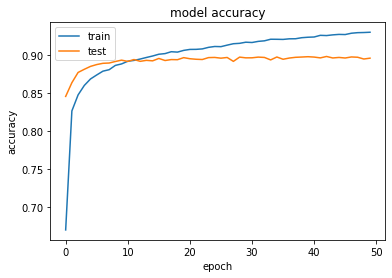

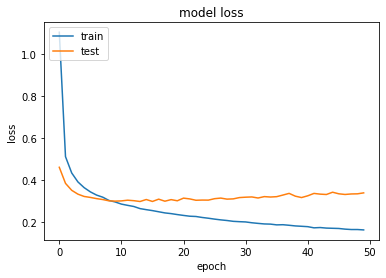

In [173]:

import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **4. 모델 저장**

In [174]:
save_path = '/content/'
team_name = 'team05'

# 트레이닝된 전체 모델을 저장합니다.
model = keras.models.load_model('/content/checkpoint_entire_best.h5')
model.save(save_path +  'model_entire_'+ team_name + '.h5')

# **5. 모델 로드 및 평가**

In [175]:
save_path = '/content/'
team_name = 'team05'

model = keras.models.load_model(save_path + 'model_entire_' + team_name + '.h5')
model.evaluate(x_test_after, y_test)

588/588 [==============================] - 2s 3ms/step - loss: 0.2679 - accuracy: 0.9049


[0.2678838074207306, 0.9049468040466309]